In [4]:
# Siamese Architecture for face recognition

import random
import numpy as np
import time
import tensorflow as tf
import math
import pdb
import sys
import scipy.io as sio
from sklearn import *
import matplotlib.pyplot as plt
import os

In [2]:
def Plot_PR_Fn(label,distance,phase):

    precision, recall, thresholds = metrics.precision_recall_curve(label, distance, pos_label=1, sample_weight=None)
    AP = metrics.average_precision_score(label, distance, average='macro', sample_weight=None)

    # AP(average precision) calculation.
    # This score corresponds to the area under the precision-recall curve.
    print("AP = ", float(("{0:.%ie}" % 1).format(AP)))

    # Plot the ROC
    fig = plt.figure()
    ax = fig.gca()
    lines = plt.plot(recall, precision, label='ROC Curve')
    plt.setp(lines, linewidth=2, color='r')
    ax.set_xticks(np.arange(0, 1.1, 0.1))
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    plt.title(phase + '_' + 'PR.jpg')
    plt.xlabel('Recall')
    plt.ylabel('Precision')

    # Cutting the floating number
    AP = '%.2f' % AP

    # Setting text to plot
    # plt.text(0.5, 0.5, 'AP = ' + str(AP), fontdict=None)
    plt.grid()
    plt.show()
    fig.savefig(save_path)

AP =  0.36


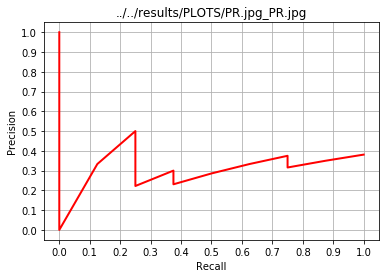

In [5]:
evaluation_dir = '../../results/SCORES' # Directory where checkpoints and event logs are written to.
plot_dir = '../../results/PLOTS' # Directory where plots are saved to.

# Loading necessary data.
score = np.load(os.path.join(evaluation_dir,'score_vector.npy'))
label = np.load(os.path.join(evaluation_dir,'target_label_vector.npy'))
save_path = os.path.join(plot_dir,'PR.jpg')

# Creating the path
if not os.path.exists(plot_dir):
        os.makedirs(plot_dir)

Plot_PR_Fn(label,score,save_path)